In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib as mpl 

# see https://holypython.com/how-to-save-matplotlib-animations-the-ultimate-guide/
# for more information on installing and configuring ffmpeg
mpl.rcParams['animation.ffmpeg_path'] = '/Users/rebecca/Applications/ffmpeg'

from util import rmse, rmse_by_month, plot_mean_errors, animate_predictions, animate_residuals

## Load the data and set up train and test sets

In [2]:
df = pd.read_csv("data/df_trains_ctx.csv")
df.head()

lon   lat  TOTEXTTAU  year  month  day        date           T  \
0 -176.5625  56.5   0.155240  1988      6    1  1988-06-01  224.617438   
1 -169.0625  56.5   0.152576  1988      6    1  1988-06-01  224.465418   
2 -161.5625  56.5   0.156077  1988      6    1  1988-06-01  224.373630   
3 -154.0625  56.5   0.154960  1988      6    1  1988-06-01  224.233717   
4 -146.5625  56.5   0.133917  1988      6    1  1988-06-01  223.987277   

     offset_1  aod_offset_1  ...   offset_27  aod_offset_27   offset_28  \
0  222.868979      0.163873  ...  225.573419       0.128559  226.981376   
1  222.561993      0.173268  ...  225.596504       0.114420  226.593252   
2  222.352100      0.166419  ...  225.560169       0.099483  225.985720   
3  222.211225      0.142224  ...  225.328833       0.092641  225.208402   
4  221.979365      0.137381  ...  224.791315       0.098885  224.288211   

   aod_offset_28   offset_29  aod_offset_29  Train_A  Test_A  Train_B  Test_B  
0       0.130827  229.257093       0.125594     True   False     True   False  
1       0.117272  229.008780       0.111849     True   False     True   False  
2       0.099029  228.609150       0.099602     True   False     True   False  
3       0.093702  227.929692       0.100677     True   False     True   False  
4       0.101869  226.916581       0.135423     True   False     True   False  

[5 rows x 70 columns]

In [3]:
X_offset_cols = [
    f"offset_{i}" for i in range(29,5, -1)
]

y_offset_cols = [
    f"offset_{i}" for i in range(5,0, -1)
] + ["T"]

aod_X_offset_cols = X_offset_cols + [
    f"aod_offset_{i}" for i in range(29, 5, -1)
]

X_Train_A = df[X_offset_cols][df.Train_A].values
X_Test_A = df[X_offset_cols][df.Test_A].values

X_Train_A_aod = df[aod_X_offset_cols][df.Train_A].values
X_Test_A_aod = df[aod_X_offset_cols][df.Test_A].values

y_Train_A = df[y_offset_cols][df.Train_A].values
y_Test_A = df[y_offset_cols][df.Test_A].values

X_Train_B = df[X_offset_cols][df.Train_B].values
X_Test_B = df[X_offset_cols][df.Test_B].values

X_Train_B_aod = df[aod_X_offset_cols][df.Train_B].values
X_Test_B_aod = df[aod_X_offset_cols][df.Test_B].values

y_Train_B = df[y_offset_cols][df.Train_B].values
y_Test_B = df[y_offset_cols][df.Test_B].values

# save the lat/lon/date values for test sets
# we will use this to plot predictions over time
# and on the map
test_A_labels = df[df.Test_A][["lon", "lat", "date"]]
test_B_labels = df[df.Test_B][["lon", "lat", "date"]]
train_A_labels = df[df.Train_A][["lon", "lat", "date"]]
train_B_labels = df[df.Train_B][["lon", "lat", "date"]]

## Fit a linear regression for each model

In [4]:
# training set A
lr_A = LinearRegression()
lr_A.fit(X_Train_A, y_Train_A)

y_pred_A = lr_A.predict(X_Test_A)

print(f"RMSE for training set A: {rmse(y_Test_A, y_pred_A, test_A_labels)}.\n")

# training set A with AOD
lr_A_aod = LinearRegression()
lr_A_aod.fit(X_Train_A_aod, y_Train_A)

y_pred_A_aod = lr_A_aod.predict(X_Test_A_aod)
print(f"RMSE for training set A with AOD: {rmse(y_Test_A, y_pred_A_aod, test_A_labels)}.\n")

# training set B
lr_B = LinearRegression()
lr_B.fit(X_Train_B, y_Train_B)

y_pred_B = lr_B.predict(X_Test_B)
print(f"RMSE for training set B: {rmse(y_Test_B, y_pred_B, test_B_labels)}.\n")

# training set B with AOD
lr_B_aod = LinearRegression()
lr_B_aod.fit(X_Train_B_aod, y_Train_B)

y_pred_B_aod = lr_A_aod.predict(X_Test_B_aod)

print(f"RMSE for training set B with AOD: {rmse(y_Test_B, y_pred_B_aod, test_B_labels)}.")

RMSE for training set A: 1.828596441872543.

RMSE for training set A with AOD: 1.901952700467822.

RMSE for training set B: 1.852899118291889.

RMSE for training set B with AOD: 1.927770919366276.


In [5]:
# consider breakdowns by month
rmse_by_month(y_Test_A, y_pred_A, test_A_labels)

array([1.49635892, 1.74668827, 1.82478021, 1.88175414, 1.9582849 ,
       2.0637122 ])

In [6]:
rmse_by_month(y_Test_A, y_pred_A_aod, test_A_labels)

array([1.51539432, 1.81050593, 1.91880996, 1.97918472, 2.04397134,
       2.14384993])

In [7]:
rmse_by_month(y_Test_B, y_pred_B, test_B_labels)

array([1.45253755, 1.75957812, 1.89309095, 1.92126133, 1.97621231,
       2.11471446])

In [8]:
rmse_by_month(y_Test_B, y_pred_B_aod, test_B_labels)

array([1.46686146, 1.83307515, 2.00552256, 2.028885  , 2.04990629,
       2.18237506])

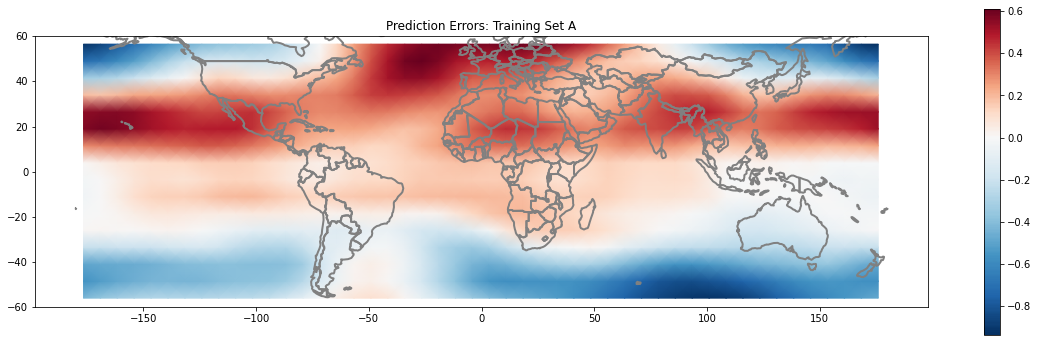

In [9]:
_ = plot_mean_errors(
    y_Test_A, 
    y_pred_A, 
    test_A_labels, 
    "Prediction Errors: Training Set A")

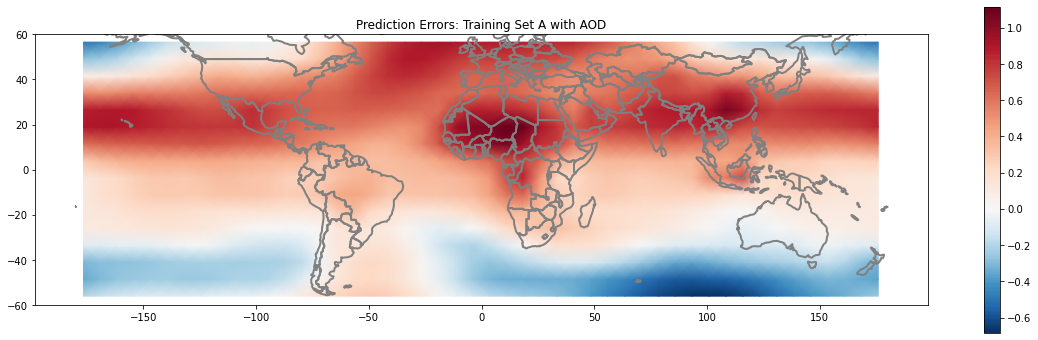

In [10]:
_ = plot_mean_errors(
    y_Test_A, 
    y_pred_A_aod, 
    test_A_labels, 
    "Prediction Errors: Training Set A with AOD")

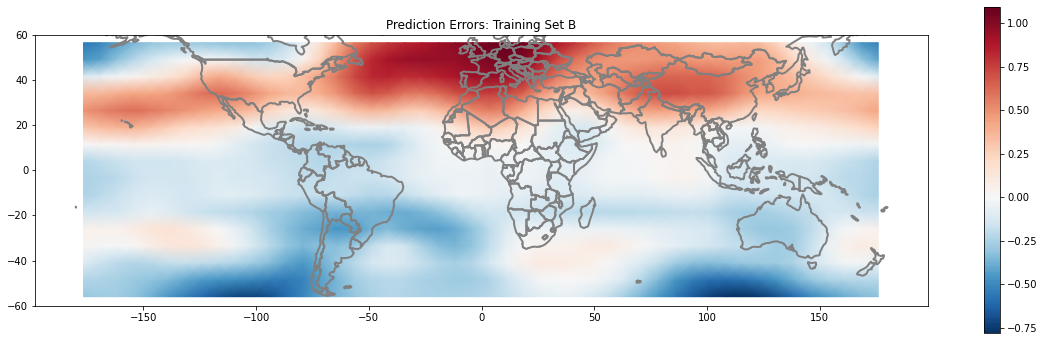

In [11]:
_ = plot_mean_errors(
    y_Test_B, 
    y_pred_B, 
    test_B_labels, 
    "Prediction Errors: Training Set B")

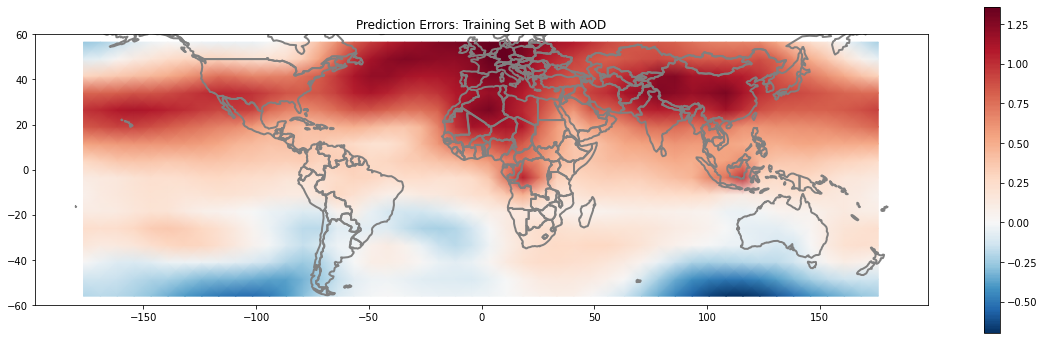

In [12]:
_ = plot_mean_errors(
    y_Test_B, 
    y_pred_B_aod, 
    test_B_labels, 
    "Prediction Errors: Training Set B with AOD")

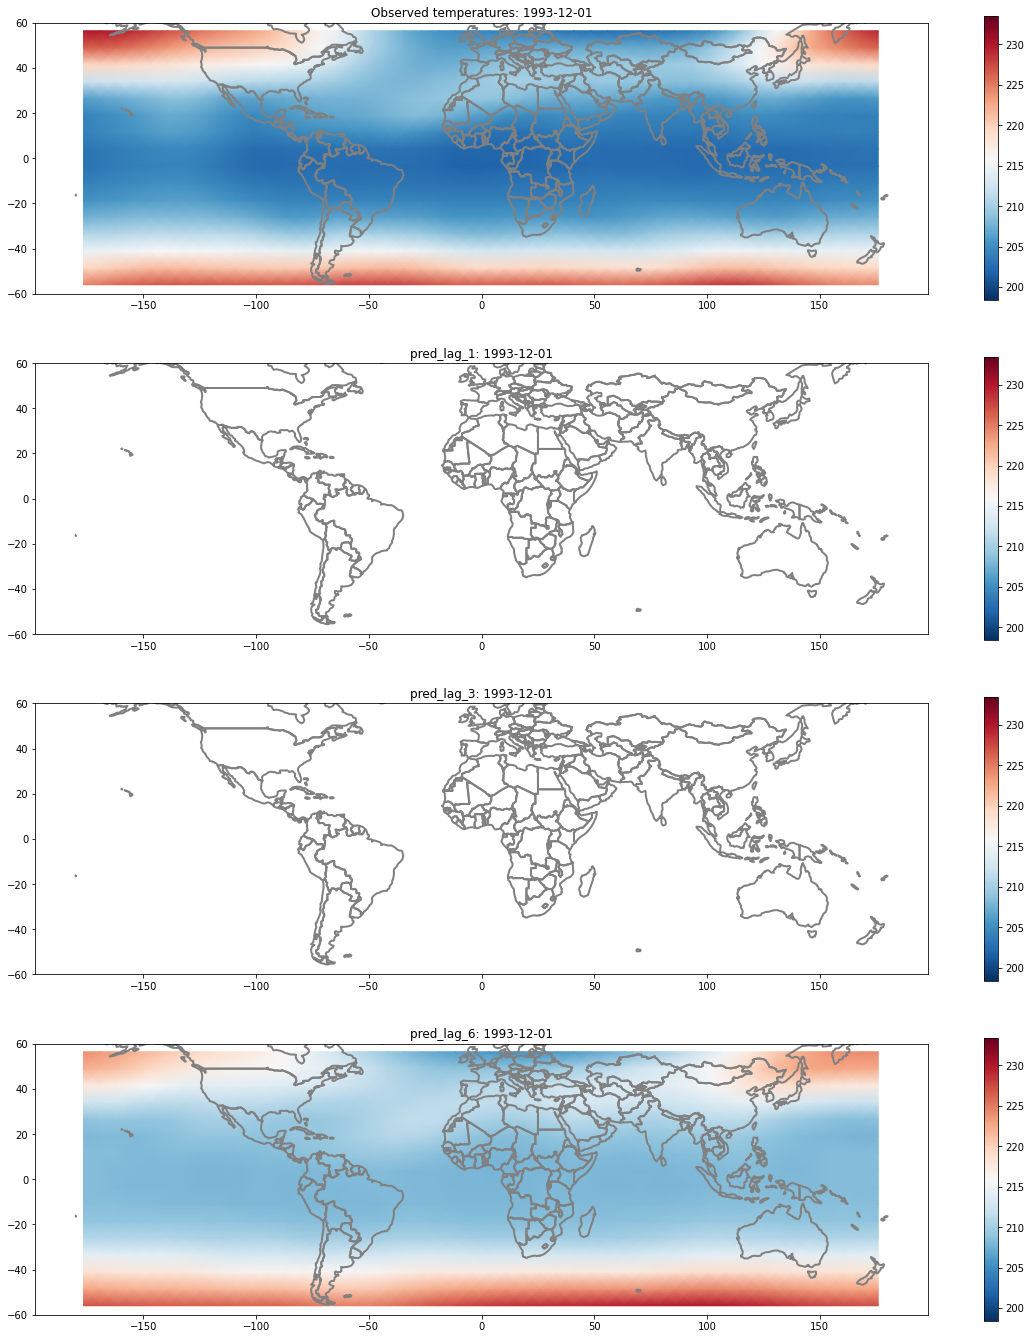

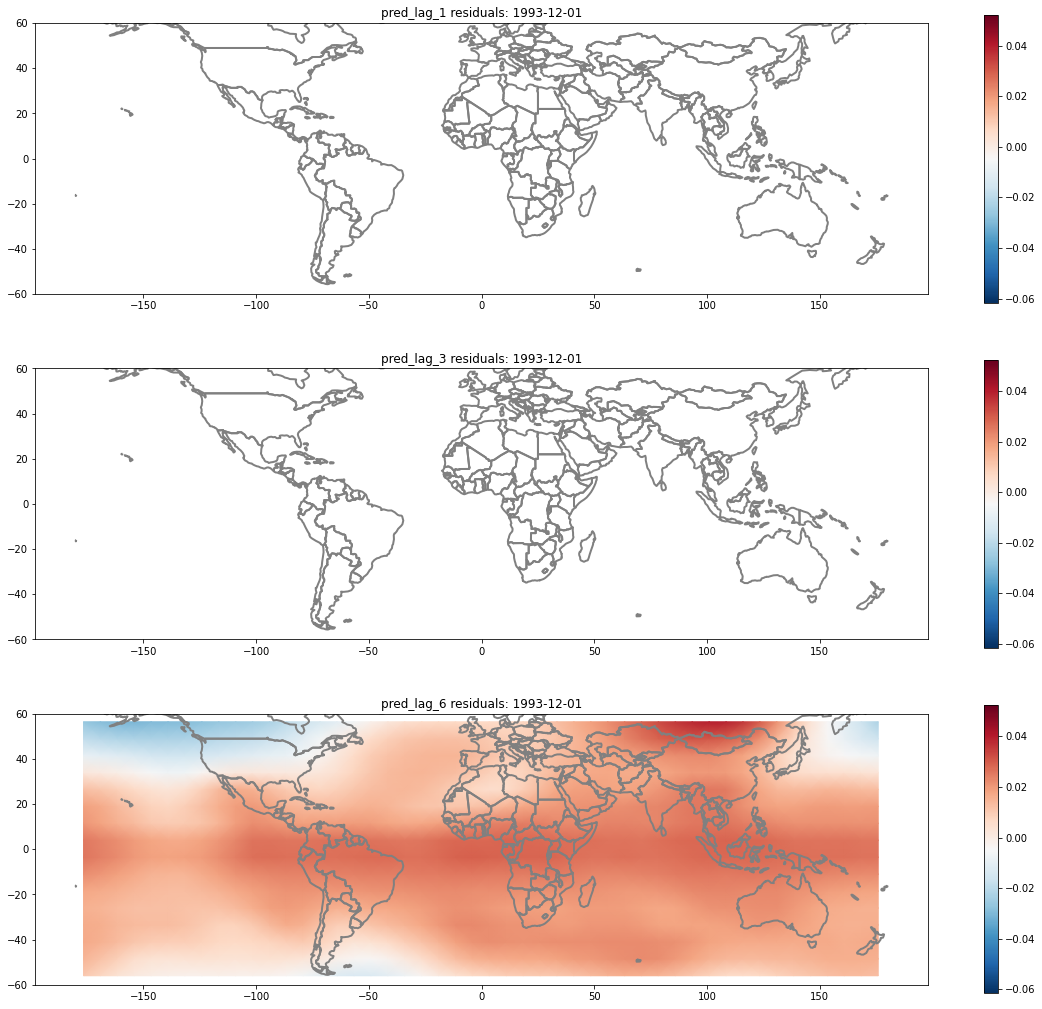

In [13]:
lags = [1,3,6]

animate_predictions(
    y_Test_A,
    y_pred_A,
    test_A_labels,
    "images/Test_A_predictions.mov",
    lags=lags
)

animate_residuals(
    y_Test_A,
    y_pred_A,
    test_A_labels,
    "images/Test_A_residuals.mov",
    lags=lags
)

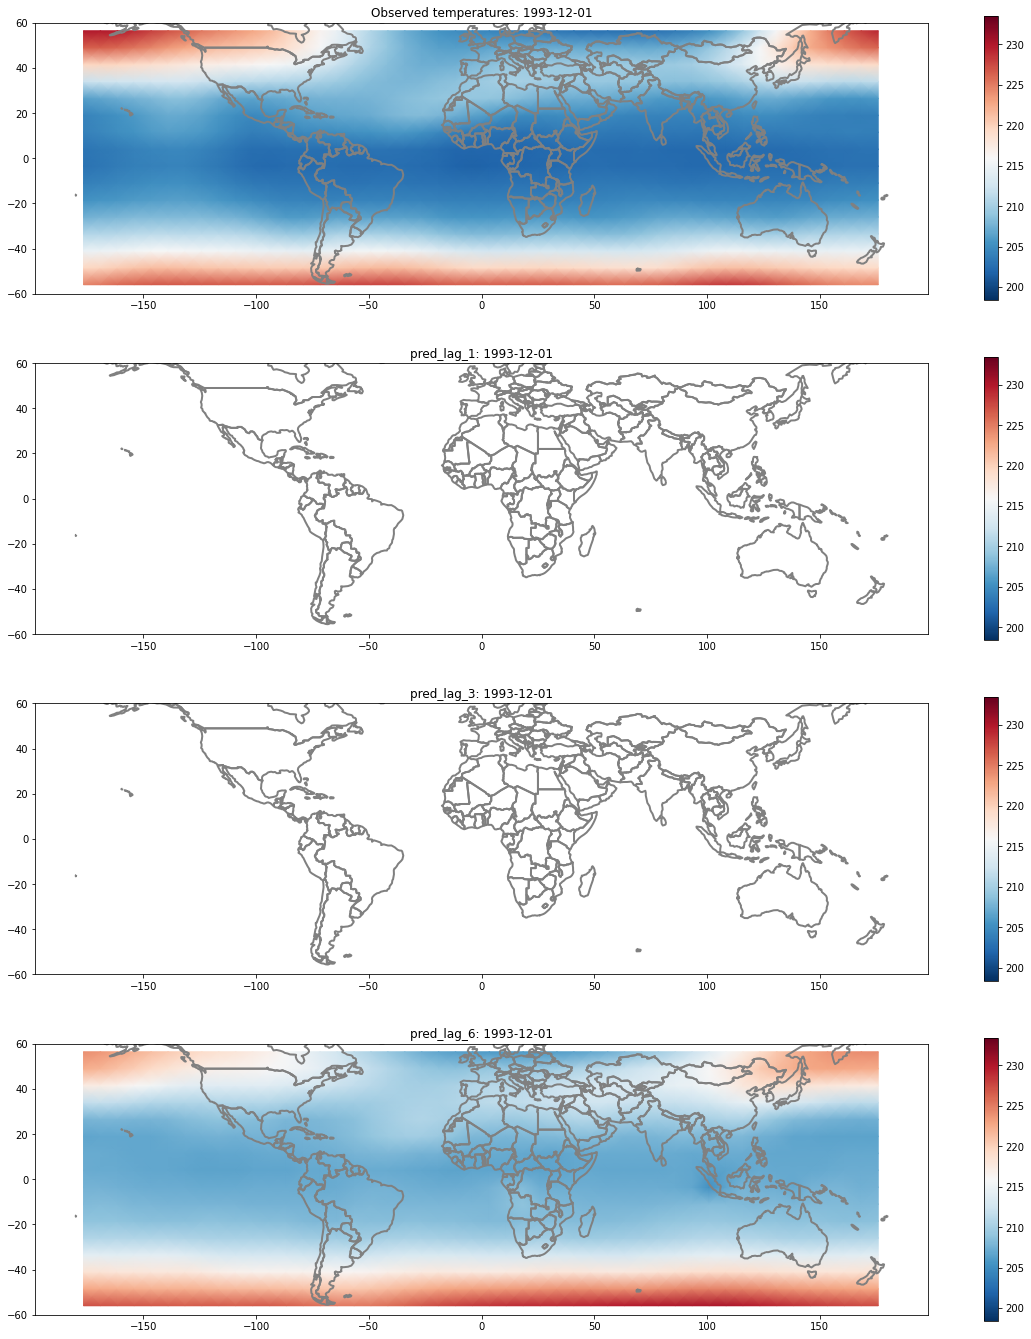

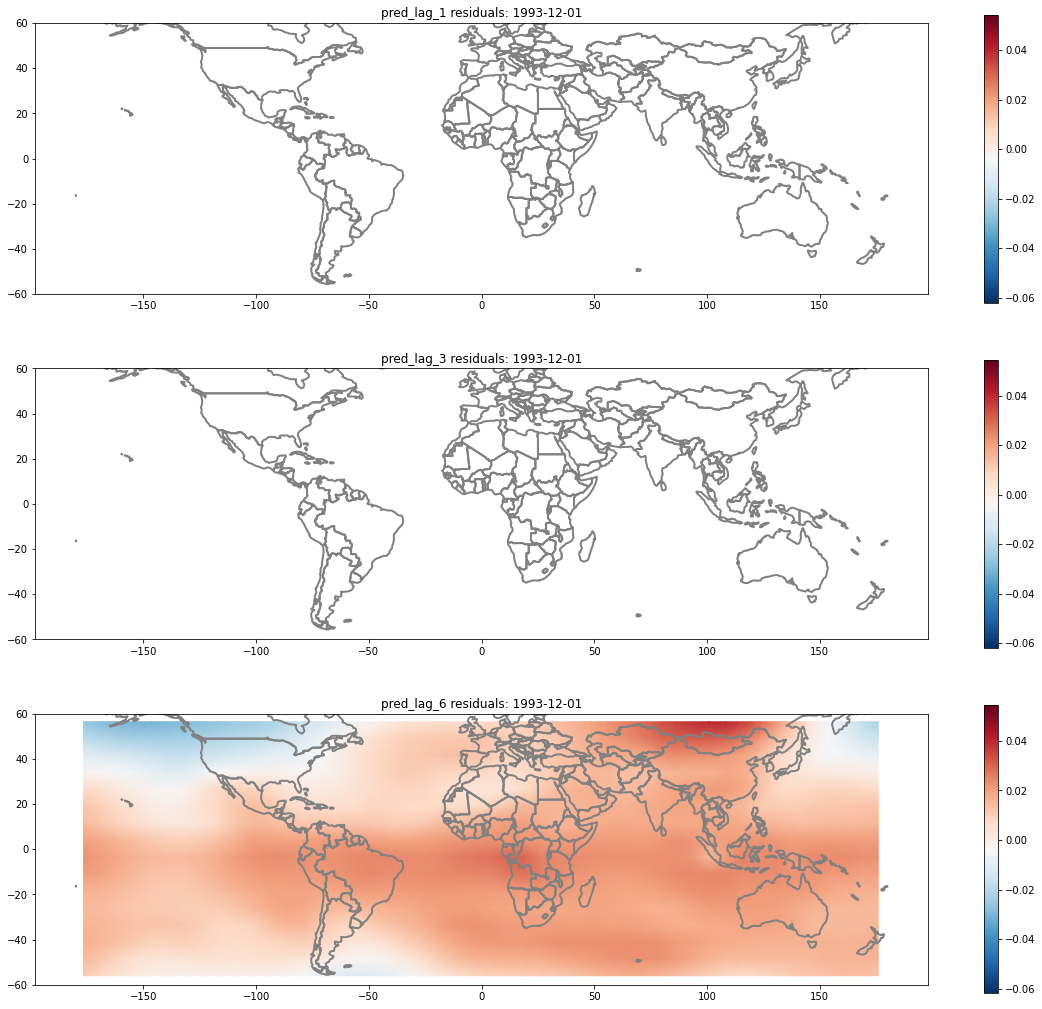

In [14]:
animate_predictions(
    y_Test_A,
    y_pred_A_aod,
    test_A_labels,
    "images/Test_A_aod_predictions.mov",
    lags=lags
)

animate_residuals(
    y_Test_A,
    y_pred_A_aod,
    test_A_labels,
    "images/Test_A_aod_residuals.mov",
    lags=lags
)

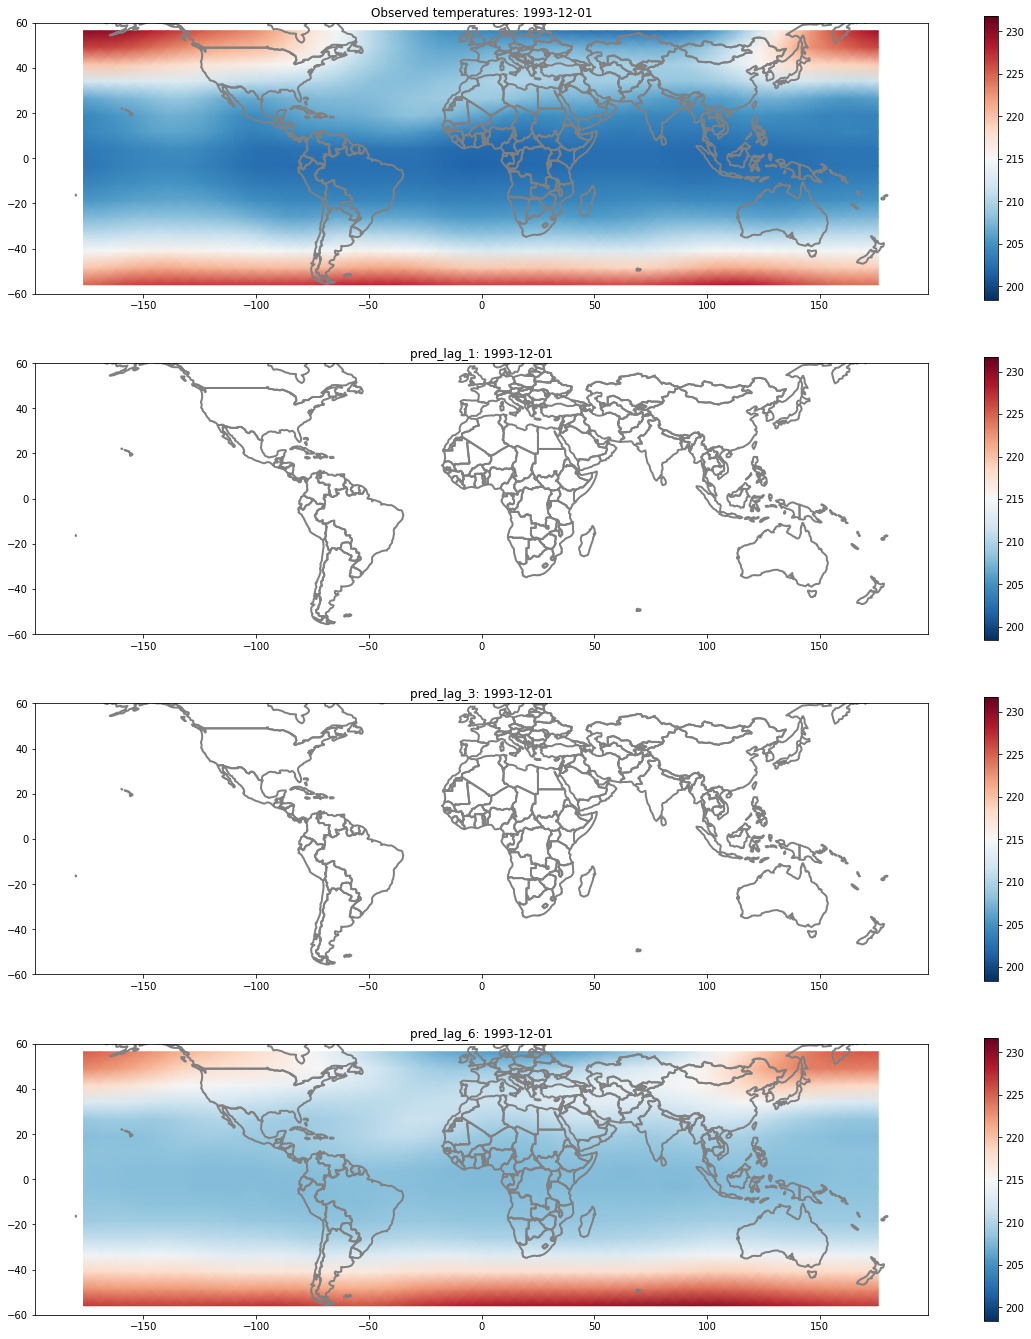

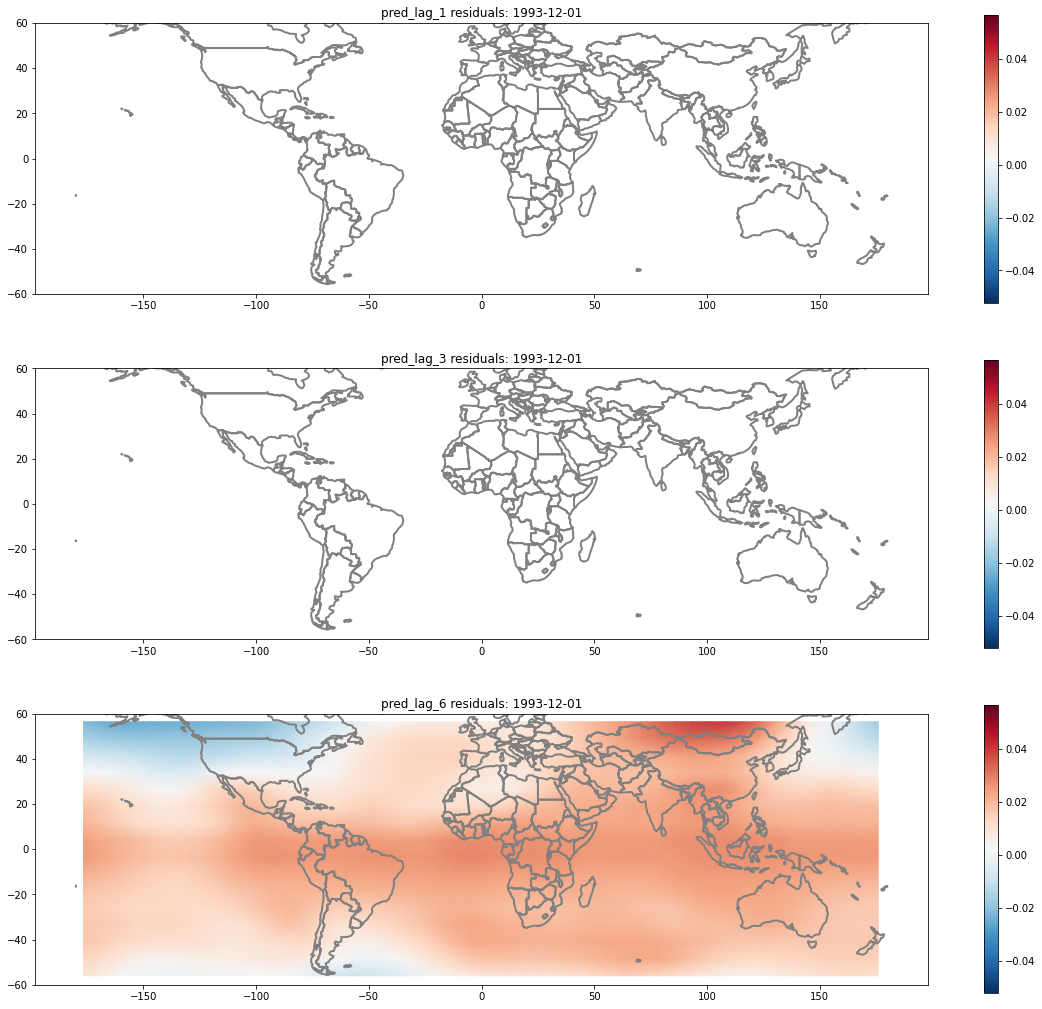

In [15]:
animate_predictions(
    y_Test_B,
    y_pred_B,
    test_B_labels,
    "images/Test_B_predictions.mov",
    lags=lags
)

animate_residuals(
    y_Test_B,
    y_pred_B,
    test_B_labels,
    "images/Test_B_residuals.mov",
    lags=lags
)

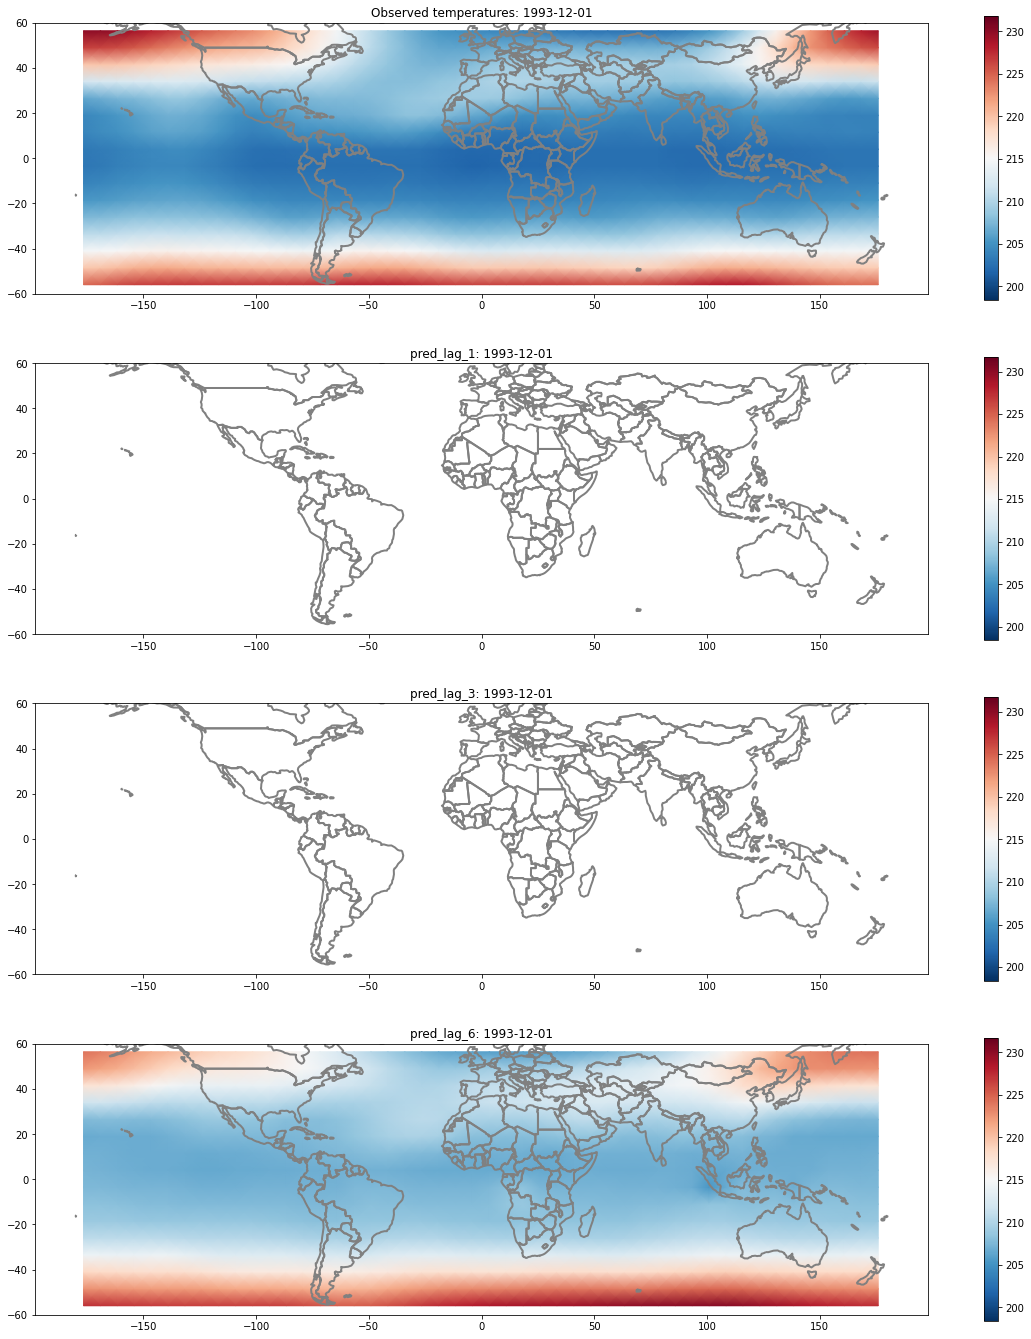

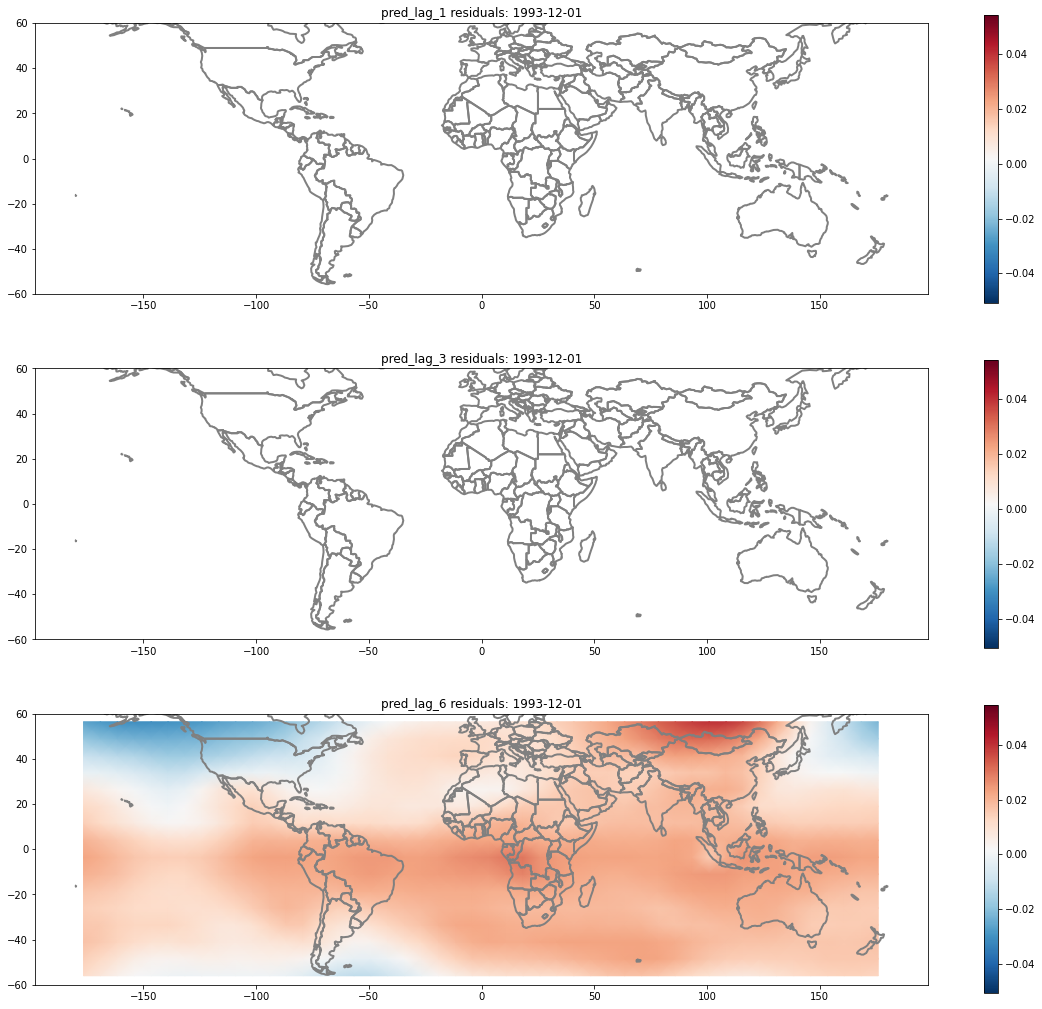

In [16]:
animate_predictions(
    y_Test_B,
    y_pred_B_aod,
    test_B_labels,
    "images/Test_B_aod_predictions.mov",
    lags=lags
)

animate_residuals(
    y_Test_B,
    y_pred_B_aod,
    test_B_labels,
    "images/Test_B_aod_residuals.mov",
    lags=lags
)

## Correlation between residuals and AOD?

In [17]:
for lag in range(6):
    cc = np.corrcoef(
        (y_pred_A - y_Test_A)[:, lag],
        df[df.Test_A]["TOTEXTTAU"])[0,1]
    print(f"Lag: {lag + 1} month(s)\tCorrelation: {cc}")

Lag: 1 month(s)	Correlation: 0.02065401846777359
Lag: 2 month(s)	Correlation: 0.0016533755418297851
Lag: 3 month(s)	Correlation: -0.031983891795999274
Lag: 4 month(s)	Correlation: -0.08092663503704632
Lag: 5 month(s)	Correlation: -0.12290622509156805
Lag: 6 month(s)	Correlation: -0.1662459056687528


In [18]:
for lag in range(6):
    cc = np.corrcoef(
        (y_pred_B - y_Test_B)[:, lag],
        df[df.Test_B]["TOTEXTTAU"])[0,1]
    print(f"Lag: {lag + 1} month(s)\tCorrelation: {cc}")

Lag: 1 month(s)	Correlation: -0.03807832898677903
Lag: 2 month(s)	Correlation: -0.06309832901670996
Lag: 3 month(s)	Correlation: -0.0791785053933221
Lag: 4 month(s)	Correlation: -0.08967154487436144
Lag: 5 month(s)	Correlation: -0.104448853602269
Lag: 6 month(s)	Correlation: -0.14507568899592496


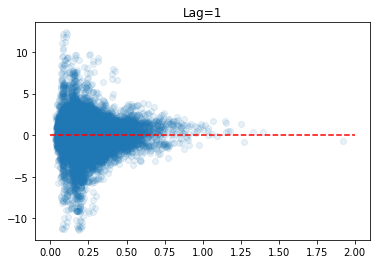

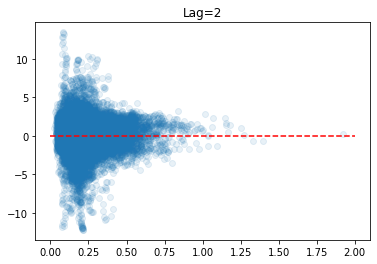

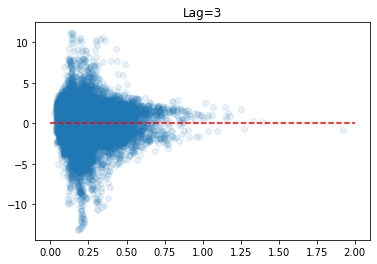

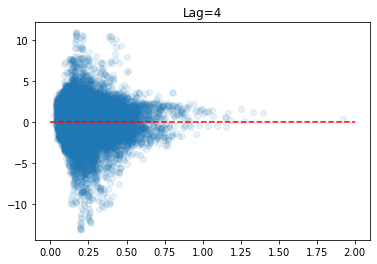

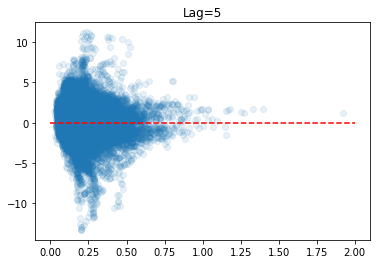

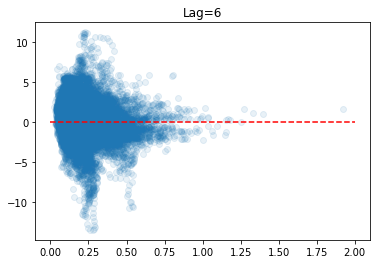

In [19]:
for lag in range(6):
    plt.figure()
    residuals = (y_pred_A - y_Test_A)[:, lag]

    plt.scatter(df[df.Test_A]["TOTEXTTAU"], residuals, alpha=0.1)
    plt.plot([0,2], [0,0], "r--")
    plt.title(f"Lag={lag+1}")

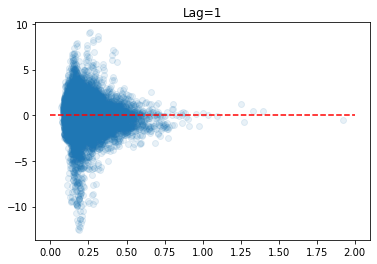

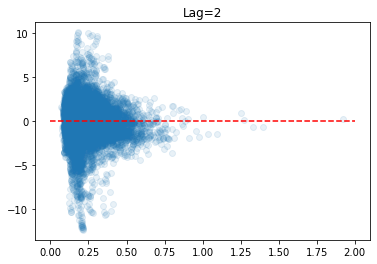

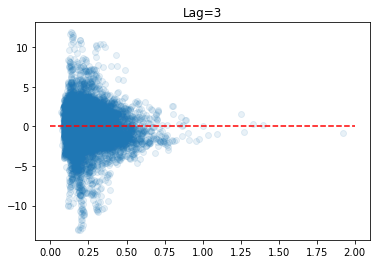

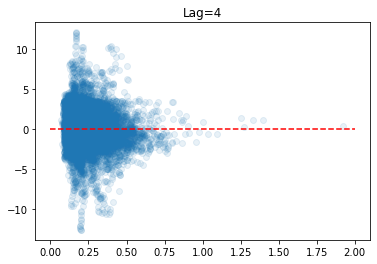

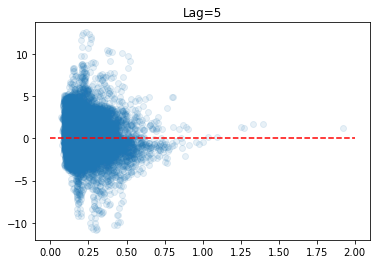

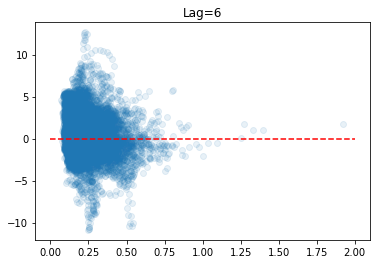

In [20]:
for lag in range(6):
    plt.figure()
    residuals = (y_pred_B - y_Test_B)[:, lag]

    plt.scatter(df[df.Test_B]["TOTEXTTAU"], residuals, alpha=0.1)
    plt.plot([0,2], [0,0], "r--")
    plt.title(f"Lag={lag+1}")

### Try normalizing temperature and AOD

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
# training set A
pipe_A = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_A.fit(X_Train_A, y_Train_A)

y_pred_A = pipe_A.predict(X_Test_A)

print(f"RMSE for training set A: {rmse(y_Test_A, y_pred_A, test_A_labels)}.\n")

# training set A with AOD
pipe_A_aod = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_A_aod.fit(X_Train_A_aod, y_Train_A)

y_pred_A_aod = pipe_A_aod.predict(X_Test_A_aod)
print(f"RMSE for training set A with AOD: {rmse(y_Test_A, y_pred_A_aod, test_A_labels)}.\n")

# training set B
pipe_B = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_B.fit(X_Train_B, y_Train_B)

y_pred_B = pipe_B.predict(X_Test_B)
print(f"RMSE for training set B: {rmse(y_Test_B, y_pred_B, test_B_labels)}.\n")

# training set B with AOD
pipe_B_aod = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_B_aod.fit(X_Train_B_aod, y_Train_B)

y_pred_B_aod = pipe_B_aod.predict(X_Test_B_aod)

print(f"RMSE for training set B with AOD: {rmse(y_Test_B, y_pred_B_aod, test_B_labels)}.")

RMSE for training set A: 1.8285964418725438.

RMSE for training set A with AOD: 1.9019527004678263.

RMSE for training set B: 1.8528991182918906.

RMSE for training set B with AOD: 1.9041393874001853.


Okay... normalizing inputs makes no difference.  What if we 
### normalize AOD by location?

In [23]:
train_A_means = df[df.Train_A].groupby(["lon", "lat"])["TOTEXTTAU"].mean()
train_A_stds = df[df.Train_A].groupby(["lon", "lat"])["TOTEXTTAU"].std()
train_B_means = df[df.Train_B].groupby(["lon", "lat"])["TOTEXTTAU"].mean()
train_B_stds = df[df.Train_B].groupby(["lon", "lat"])["TOTEXTTAU"].std()

In [24]:
df["train_A_mean_aod"] = df.apply(lambda row: train_A_means[row["lon"], row["lat"]],axis=1)
df["train_B_mean_aod"] = df.apply(lambda row: train_B_means[row["lon"], row["lat"]],axis=1)
df["train_A_std_aod"] = df.apply(lambda row: train_A_stds[row["lon"], row["lat"]],axis=1)
df["train_B_std_aod"] = df.apply(lambda row: train_B_stds[row["lon"], row["lat"]],axis=1)

In [ ]:
offset_norm_A_cols = []
offset_norm_B_cols = []

for col in aod_X_offset_cols[24:]:
    df[col + "_norm_A"] = df.apply(lambda row: (row[col] - row["train_A_mean_aod"]) / row["train_A_std_aod"],axis=1)
    offset_norm_A_cols.append(col + "_norm_A")
    df[col + "_norm_B"] = df.apply(lambda row: (row[col] - row["train_A_mean_aod"]) / row["train_A_std_aod"],axis=1)
    offset_norm_B_cols.append(col + "_norm_B")

In [ ]:
offset_norm_A_cols

In [ ]:
X_Train_A_aod_norm = df[X_offset_cols + offset_norm_A_cols][df.Train_A].values
X_Test_A_aod_norm = df[X_offset_cols + offset_norm_A_cols][df.Test_A].values

X_Train_B_aod_norm = df[X_offset_cols + offset_norm_B_cols][df.Train_B].values
X_Test_B_aod_norm = df[X_offset_cols + offset_norm_B_cols][df.Test_B].values

In [ ]:
# training set A with AOD
lr_A_aod_norm = LinearRegression()
lr_A_aod_norm.fit(X_Train_A_aod_norm, y_Train_A)

y_pred_A_aod_norm = lr_A_aod_norm.predict(X_Test_A_aod_norm)
print(f"RMSE for training set A with AOD: {rmse(y_Test_A, y_pred_A_aod_norm, test_A_labels)}.\n")

# training set B with AOD
lr_B_aod_norm = LinearRegression()
lr_B_aod_norm.fit(X_Train_B_aod_norm, y_Train_B)

y_pred_B_aod_norm = lr_A_aod_norm.predict(X_Test_B_aod_norm)

print(f"RMSE for training set B with AOD: {rmse(y_Test_B, y_pred_B_aod_norm, test_B_labels)}.")

In [ ]:
def inspect_coefs(model, feature_names):
    coefs = pd.DataFrame(model.coef_).T
    coefs.columns = [f"lag_{i}" for i in range(1,7)]
    coefs.index = feature_names
    return coefs

coefs = inspect_coefs(lr_A_aod_norm, X_offset_cols + offset_norm_A_cols)
coefs